# Problem Statement

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

# Import Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data
## Data Source:- https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

### Show First five row

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


### Check data shape

In [5]:
print(train.shape)
print(test.shape)

(54808, 14)
(23490, 13)


In [6]:
train.describe()   # Descriptive

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [7]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [8]:
train.info()   # Information of datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [10]:
train.isnull().sum()  # Check Null Values

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

<AxesSubplot:>

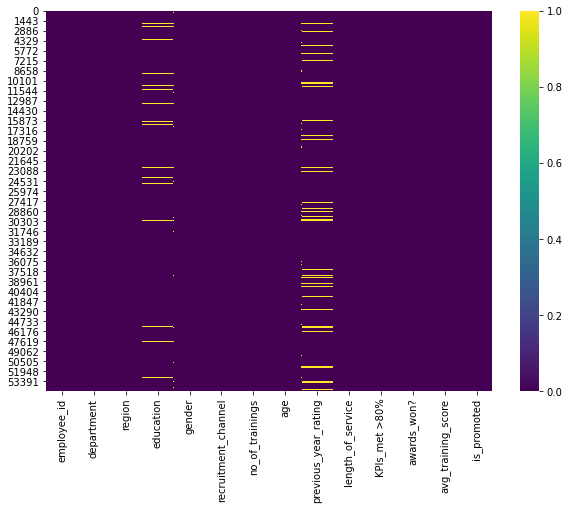

In [12]:
# Show null values by heatmap
plt.figure(figsize=(10,7))
sns.heatmap(train.isnull(), cmap = 'viridis')

### Check unique values in data

In [13]:
print(train['education'].value_counts())
print(train['previous_year_rating'].value_counts())

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64


In [14]:
print(test['education'].value_counts())
print(test['previous_year_rating'].value_counts())

Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64
3.0    7921
5.0    5097
4.0    4249
1.0    2680
2.0    1731
Name: previous_year_rating, dtype: int64


### Filling Missing values with mode

In [15]:
train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

In [16]:
test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

In [17]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [18]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


### Visualization

<AxesSubplot:xlabel='gender', ylabel='count'>

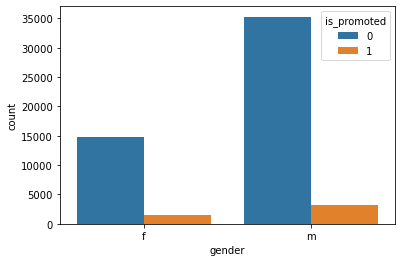

In [20]:
sns.countplot(x = 'gender' , hue = 'is_promoted' , data = train)

<AxesSubplot:xlabel='length_of_service', ylabel='count'>

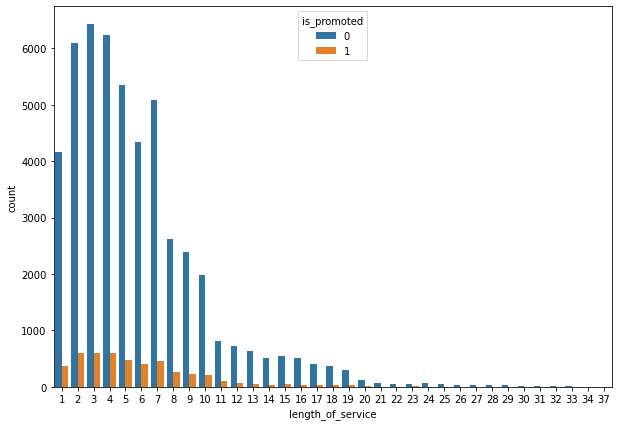

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'length_of_service' , hue = 'is_promoted' , data = train)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [23]:
# Drop unnecessary column
train.drop(columns=['employee_id','region'], axis = 1 , inplace = True)

In [24]:
Employeeid = test['employee_id']
Employeeid

0         8724
1        74430
2        72255
3        38562
4        64486
         ...  
23485    53478
23486    25600
23487    45409
23488     1186
23489     5973
Name: employee_id, Length: 23490, dtype: int64

In [25]:
test.drop(columns=['employee_id','region'], axis = 1 , inplace = True)

In [26]:
print(train['department'].value_counts())
print(train['education'].value_counts())
print(train['gender'].value_counts())
print(train['recruitment_channel'].value_counts())


Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64
m    38496
f    16312
Name: gender, dtype: int64
other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64


In [27]:
print(test['department'].value_counts())
print(test['education'].value_counts())
print(test['gender'].value_counts())
print(test['recruitment_channel'].value_counts())


Sales & Marketing    7315
Operations           4764
Procurement          3020
Technology           3011
Analytics            2319
Finance              1091
HR                   1085
Legal                 445
R&D                   440
Name: department, dtype: int64
Bachelor's          16612
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64
m    16596
f     6894
Name: gender, dtype: int64
other       13078
sourcing     9961
referred      451
Name: recruitment_channel, dtype: int64


# categorical to numerical

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()

In [30]:
train['department'] = le.fit_transform(train['department'])
train['education'] = le.fit_transform(train['education'])
train['gender'] = le.fit_transform(train['gender'])
train['recruitment_channel'] = le.fit_transform(train['recruitment_channel'])

In [31]:
test['department'] = le.fit_transform(test['department'])
test['education'] = le.fit_transform(test['education'])
test['gender'] = le.fit_transform(test['gender'])
test['recruitment_channel'] = le.fit_transform(test['recruitment_channel'])

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  int32  
 1   education             54808 non-null  int32  
 2   gender                54808 non-null  int32  
 3   recruitment_channel   54808 non-null  int32  
 4   no_of_trainings       54808 non-null  int64  
 5   age                   54808 non-null  int64  
 6   previous_year_rating  54808 non-null  float64
 7   length_of_service     54808 non-null  int64  
 8   KPIs_met >80%         54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
dtypes: float64(1), int32(4), int64(7)
memory usage: 4.2 MB


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            23490 non-null  int32  
 1   education             23490 non-null  int32  
 2   gender                23490 non-null  int32  
 3   recruitment_channel   23490 non-null  int32  
 4   no_of_trainings       23490 non-null  int64  
 5   age                   23490 non-null  int64  
 6   previous_year_rating  23490 non-null  float64
 7   length_of_service     23490 non-null  int64  
 8   KPIs_met >80%         23490 non-null  int64  
 9   awards_won?           23490 non-null  int64  
 10  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int32(4), int64(6)
memory usage: 1.6 MB


# Corelation

<AxesSubplot:>

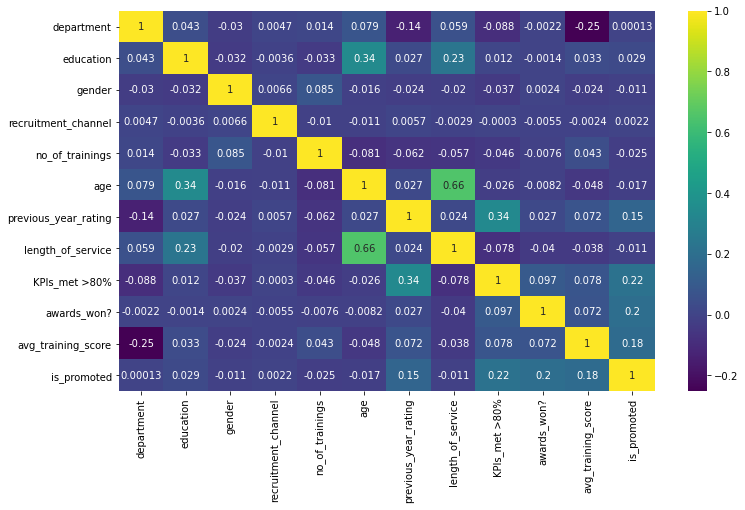

In [34]:
plt.figure(figsize=(12,7))
sns.heatmap(data = train.corr(), annot = True, cmap = 'viridis')

# Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = train.drop(columns = ['is_promoted'], axis = 1)
y = train['is_promoted']

print(X.shape)
print(y.shape)

(54808, 11)
(54808,)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=151)

# ML Algorithim Xgboost 

In [38]:
from xgboost import XGBClassifier

In [39]:
model = XGBClassifier(learning_rate=0.1,max_depth=3,n_estimators=500,num_parallel_tree=5)

In [40]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=5, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [41]:
y_pred = model.predict(X_test)

# import matrics

In [42]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [43]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[15024    38]
 [  901   480]]
0.942893632548805


### Model gives 94% of accuracy which is pretty good 

# Creating a blank dataframe

In [44]:
data = pd.DataFrame()
data

""


In [45]:
test

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8,0,1,2,1,24,3.0,1,1,0,77
1,2,0,0,0,1,31,3.0,5,0,0,51
2,7,0,1,0,1,31,1.0,4,0,0,47
3,5,0,0,0,3,31,2.0,9,0,0,65
4,1,0,1,2,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...
23485,3,1,1,2,1,24,3.0,1,0,0,61
23486,8,0,1,2,1,31,3.0,7,0,0,74
23487,2,0,0,2,1,26,4.0,4,0,0,50
23488,5,0,1,2,3,27,3.0,1,0,0,70


In [46]:
xf = test.values
xf

array([[ 8.,  0.,  1., ...,  1.,  0., 77.],
       [ 2.,  0.,  0., ...,  0.,  0., 51.],
       [ 7.,  0.,  1., ...,  0.,  0., 47.],
       ...,
       [ 2.,  0.,  0., ...,  0.,  0., 50.],
       [ 5.,  0.,  1., ...,  0.,  0., 70.],
       [ 8.,  2.,  1., ...,  1.,  0., 89.]])

In [47]:
y_final = model.predict(xf)
y_final

array([0, 0, 0, ..., 0, 0, 1])

In [48]:
print(y_final.shape)
print(Employeeid.shape)

(23490,)
(23490,)


In [49]:
data['employee_id'] = Employeeid
data['is_promoted'] = y_final

data

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


# Save data into a csv file

In [50]:
data.to_csv(index = False)

'employee_id,is_promoted\r\n8724,0\r\n74430,0\r\n72255,0\r\n38562,0\r\n64486,0\r\n46232,0\r\n54542,0\r\n67269,0\r\n66174,0\r\n76303,0\r\n60245,0\r\n42639,0\r\n30963,0\r\n54055,0\r\n42996,0\r\n12737,0\r\n27561,0\r\n26622,0\r\n31582,0\r\n29793,0\r\n72735,0\r\n5677,0\r\n60889,0\r\n51498,0\r\n8566,0\r\n53151,0\r\n16203,0\r\n61083,0\r\n74849,0\r\n13259,0\r\n72407,0\r\n65237,0\r\n67672,0\r\n77460,0\r\n67317,0\r\n68788,0\r\n36834,0\r\n64281,0\r\n1822,0\r\n55325,0\r\n41432,0\r\n52061,0\r\n39973,0\r\n42524,0\r\n7935,0\r\n49940,0\r\n10059,0\r\n44159,0\r\n76691,0\r\n3720,0\r\n5621,0\r\n24147,0\r\n33997,0\r\n64076,0\r\n21379,0\r\n23714,0\r\n19866,0\r\n4529,0\r\n64703,0\r\n19649,0\r\n6596,0\r\n7999,0\r\n4762,0\r\n5387,0\r\n24620,0\r\n57989,0\r\n75619,0\r\n26977,0\r\n65975,0\r\n51302,0\r\n63714,0\r\n70556,0\r\n70117,0\r\n51972,0\r\n60572,0\r\n9548,0\r\n64,0\r\n35510,0\r\n10732,0\r\n9214,0\r\n10761,0\r\n32110,0\r\n50038,0\r\n1555,0\r\n21200,0\r\n50380,0\r\n45009,0\r\n65450,0\r\n77333,0\r\n2347,0\r\n8

In [51]:
data.to_csv('Submission_Hr_Analytics.csv',index = False)

## This model gives me 1552 rank over 15999 